In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/ivanb/Desktop/UBA/MetodosNumericos/tp3-metodos-numericos/tp3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/ivanb/Desktop/UBA/Metodos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from itertools import cycle
import metnum

In [4]:
df = pd.read_csv('../data/train.csv')

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

id  antiguedad  habitaciones    garages      banos  \
count 240000.000  196445.000    217529.000 202235.000 213779.000   
mean  149969.382       8.116         2.902      1.547      2.132   
std    86634.580       9.554         0.897      0.854      0.913   
min        1.000       0.000         1.000      0.000      1.000   
25%    74930.750       0.000         2.000      1.000      1.000   
50%   149875.500       5.000         3.000      2.000      2.000   
75%   225016.500      10.000         3.000      2.000      3.000   
max   299999.000      80.000        10.000      3.000      4.000   

       metroscubiertos  metrostotales       idzona        lat        lng  \
count       222600.000     188533.000   211379.000 116512.000 116512.000   
mean           174.017        176.765  2423467.825     20.697    -99.509   
std             98.153         94.427 10567938.364      3.138      9.744   
min             15.000         15.000       22.000   -100.887   -125.859   
25%             90.000        102.000    24890.000     19.360   -100.978   
50%            153.000        155.000    56383.000     19.543    -99.240   
75%            240.000        238.000    87838.000     20.740    -99.135   
max            439.000        439.000 50003999.000     83.026    121.036   

        gimnasio  usosmultiples    piscina  escuelascercanas  \
count 240000.000     240000.000 240000.000        240000.000   
mean       0.062          0.055      0.087             0.444   
std        0.242          0.228      0.282             0.497   
min        0.000          0.000      0.000             0.000   
25%        0.000          0.000      0.000             0.000   
50%        0.000          0.000      0.000             0.000   
75%        0.000          0.000      0.000             1.000   
max        1.000          1.000      1.000             1.000   

       centroscomercialescercanos       precio  
count                  240000.000   240000.000  
mean                        0.397  2530838.346  
std                         0.489  2152551.798  
min                         0.000   310000.000  
25%                         0.000   952772.500  
50%                         0.000  1850000.000  
75%                         1.000  3390000.000  
max                         1.000 12525000.000

## Creamos las nuevas variables (feature engineering)

In [4]:
descripciones = df.descripcion.str.split(' ').str.len()

In [5]:
df['longitud_descripciones'] = descripciones

In [6]:
df['rating_familiar'] = 2**( (df['habitaciones']) + (df['banos']) ) + 2 * df['metroscubiertos'] + 25 * df['escuelascercanas']

In [7]:
df[df['rating_familiar'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37044 entries, 9 to 239988
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37044 non-null  int64  
 1   titulo                      36255 non-null  object 
 2   descripcion                 36727 non-null  object 
 3   tipodepropiedad             37011 non-null  object 
 4   direccion                   25135 non-null  object 
 5   ciudad                      36914 non-null  object 
 6   provincia                   36957 non-null  object 
 7   antiguedad                  24618 non-null  float64
 8   habitaciones                14573 non-null  float64
 9   garages                     25771 non-null  float64
 10  banos                       10823 non-null  float64
 11  metroscubiertos             19644 non-null  float64
 12  metrostotales               30609 non-null  float64
 13  idzona                      31

In [8]:
df['ciudad'].value_counts()

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
                   ...  
ácatlán                1
Galeana                1
Cedral                 1
ZirAndaro              1
Poanas                 1
Name: ciudad, Length: 875, dtype: int64

<AxesSubplot:>

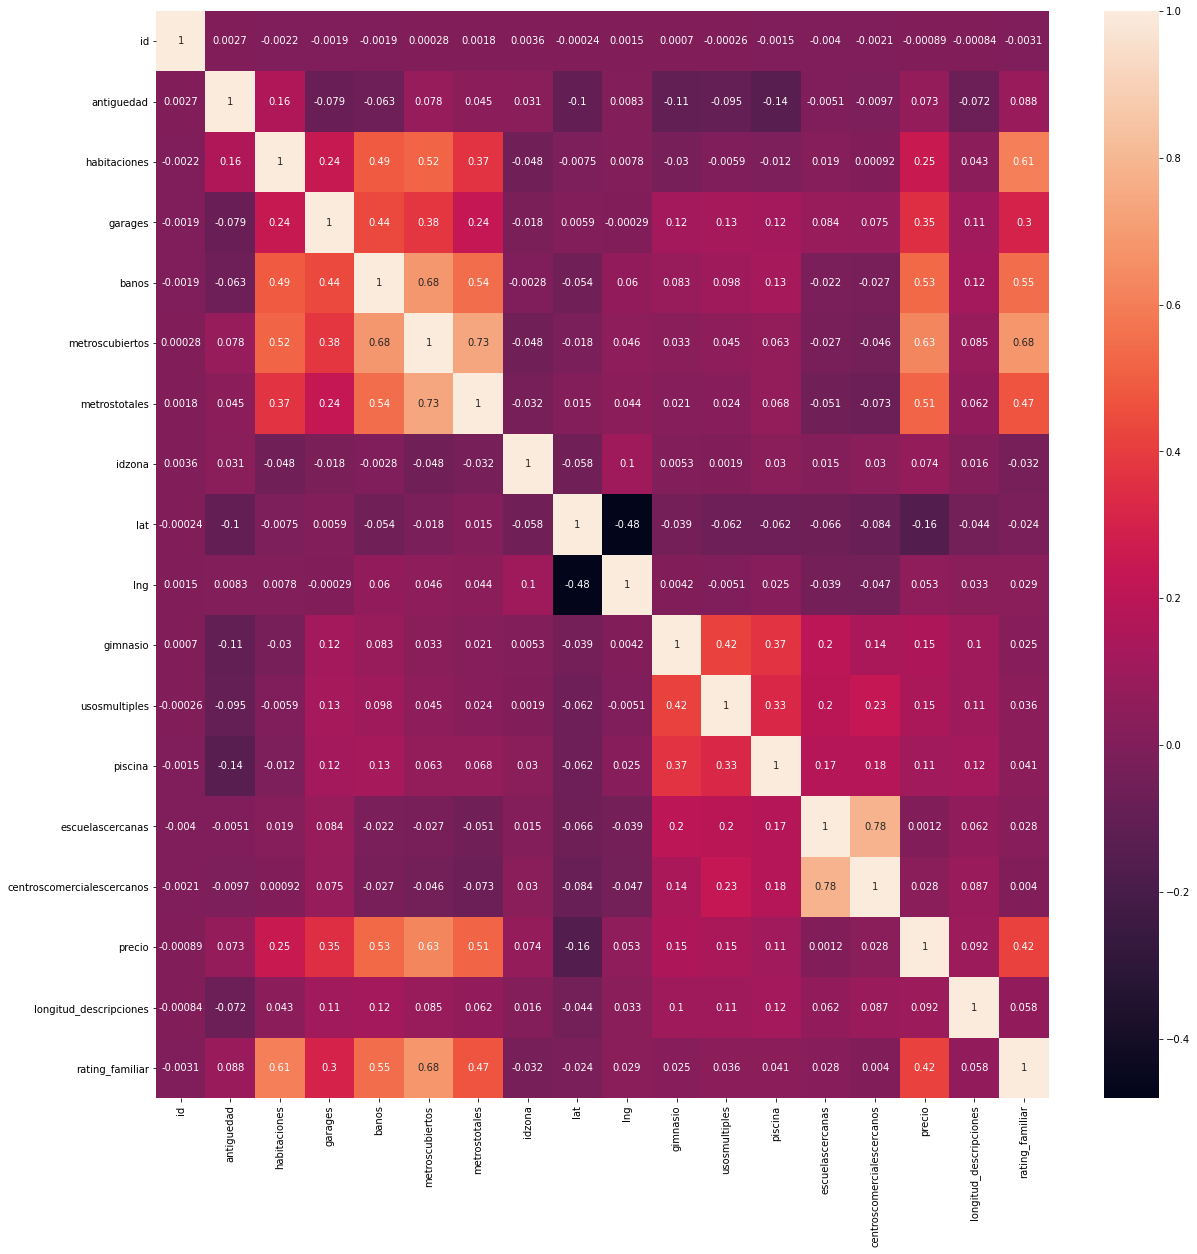

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)

In [10]:
df_cancun = df[df['ciudad']=='Cancún'].dropna()
df_cancun.pop('lat')
df_cancun.pop('id')
df_cancun.pop('lng')
df_cancun.pop('idzona')

87        50003005.0
525       50003045.0
1279      50002774.0
1523      50002982.0
2132      50002921.0
             ...    
238990    50002773.0
239241    50003433.0
239424    50002774.0
239445    50003428.0
239889    50002962.0
Name: idzona, Length: 592, dtype: float64

<AxesSubplot:>

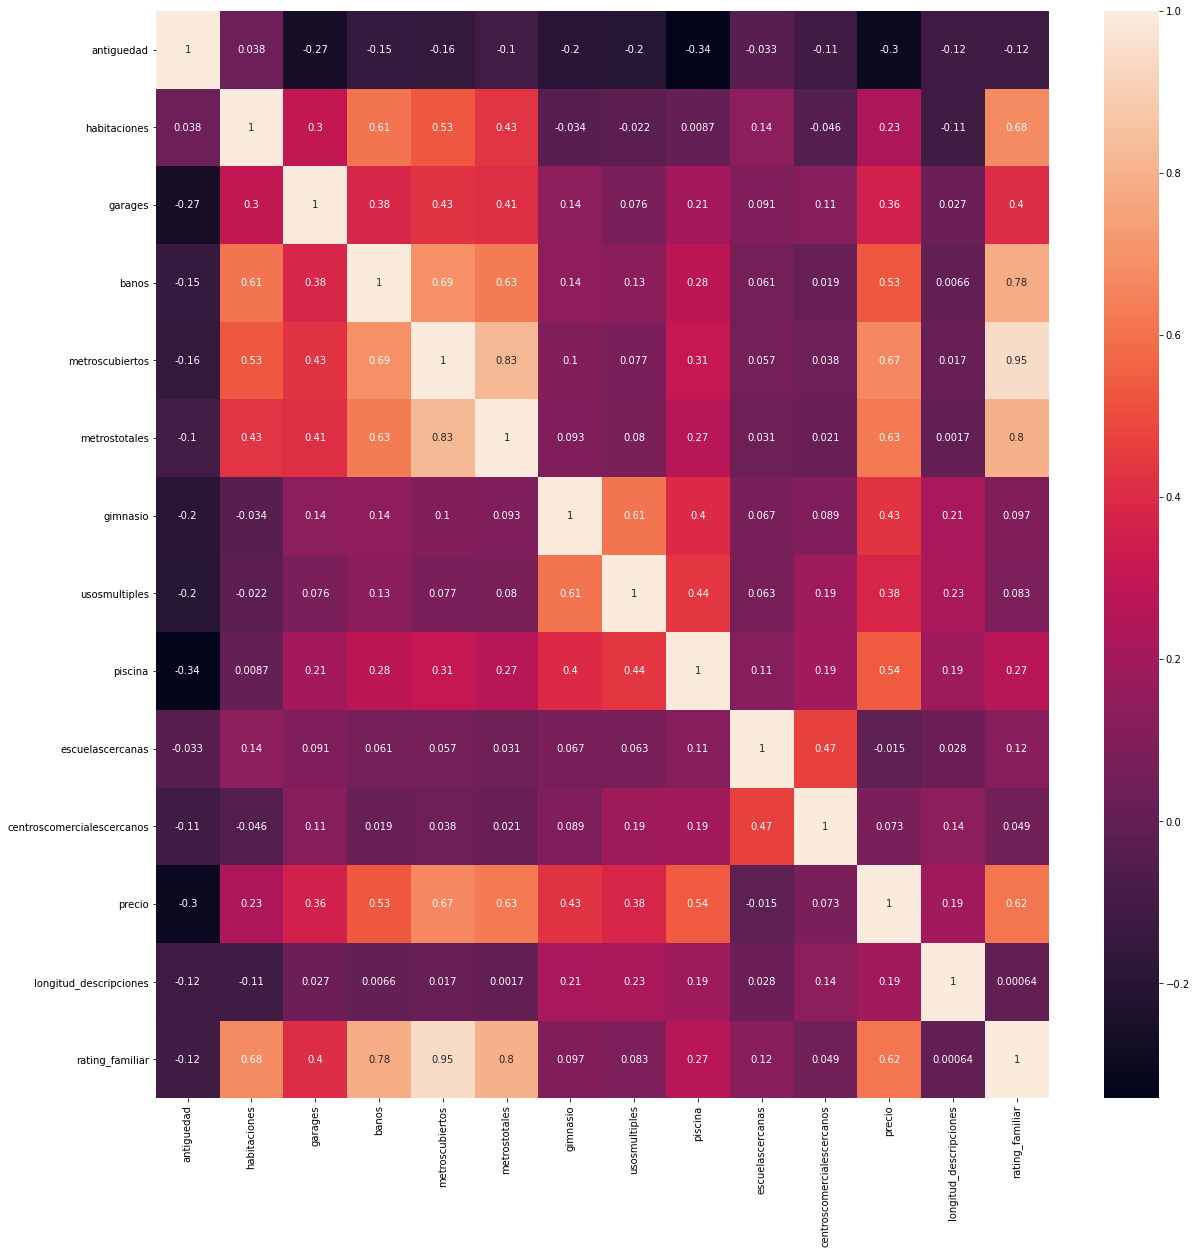

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_cancun.corr(), annot = True)

In [12]:
df_cancun_lasso = df_cancun
df_cancun_noprecio = df_cancun.copy()
df_cancun_noprecio.pop('precio')
df_cancun_lasso = df_cancun_lasso.select_dtypes(['float64'])
df_cancun_noprecio = df_cancun_noprecio.select_dtypes(['float64'])

In [13]:
df_cancun_noprecio.columns.values

array(['antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos',
       'longitud_descripciones', 'rating_familiar'], dtype=object)

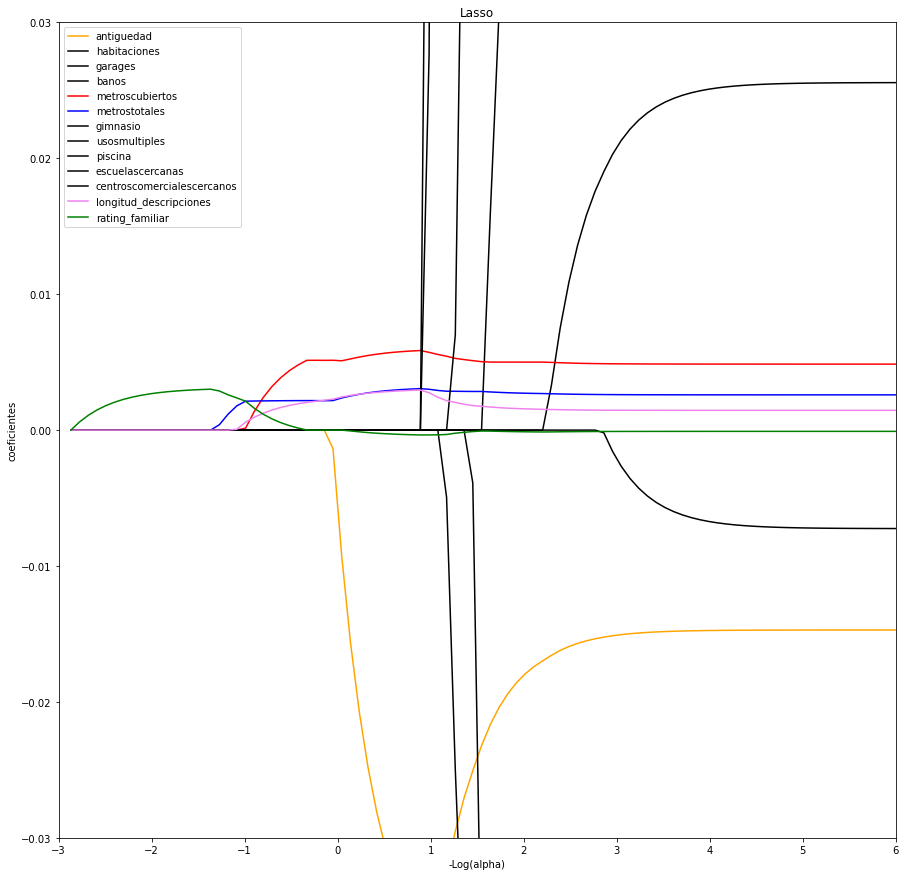

In [14]:
df_cancun_lasso /= df_cancun_lasso.std(axis=0)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(df_cancun_noprecio,df_cancun_lasso['precio'],eps = 5e-10, fit_intercept=False)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

colors = cycle(['black', 'tab:orange', 'tab:green', 'tab:red', 'black', 'black', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'black', 'black'])
colors = cycle(['orange', 'black', 'black', 'black', 'red', 'blue', 'black', 'black', 'black', 'black', 'black', 'violet', 'green'])
plt.figure(figsize=(15, 15))
lineas = []
for coef_l, c in zip(coefs_lasso, colors):
    lineas.append(plt.plot(neg_log_alphas_lasso, coef_l, c = c))

plt.xlabel('-Log(alpha)')
plt.ylabel('coeficientes')
plt.title('Lasso')
plt.legend(df_cancun_noprecio.columns.values)
plt.axis('tight')
plt.ylim(-0.03,0.03)
plt.xlim(-3,6)
plt.show()

## Segmentamos el dataset

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.options.display.max_rows = 15

# Tomamos la ciudad con menor desvio standard entre todas las ciudades con más de 3000 datos

lista_aux = df['ciudad'].value_counts()[df['ciudad'].value_counts()>3000].index

lista = df['ciudad'].isin(lista_aux)

df[lista].groupby('ciudad').std()

id  antiguedad  habitaciones   garages  \
ciudad                                                                   
Alvaro Obregón        86274.255273   10.379449      0.818662  0.892233   
Atizapán de Zaragoza  86577.726330    9.211604      0.758927  0.857496   
Benito Juárez         85815.170361   12.252472      0.855231  0.767933   
Cancún                86137.161451    5.169331      0.829604  0.767645   
Chihuahua             85917.069097    8.473267      0.707695  0.904503   
...                            ...         ...           ...       ...   
San Luis Potosí       86927.790142    7.300650      0.734729  0.772346   
Tlajomulco de Zúñiga  86429.130629    3.716323      0.621717  0.849794   
Tlalnepantla de Baz   88421.719333   10.379165      0.962051  0.878473   
Tlalpan               87089.645627    9.818383      0.895890  0.924771   
Zapopan               86258.296683    6.713965      0.757166  0.813401   

                         banos  metroscubiertos  metrostotales        idzona  \
ciudad                                                                         
Alvaro Obregón        0.859123       104.513792     101.023784  2.266040e+04   
Atizapán de Zaragoza  0.880075       108.117853      98.520981  2.231591e+06   
Benito Juárez         0.688487        74.580317      78.753410  2.494285e+07   
Cancún                0.915072        91.830425      86.510421  2.565164e+02   
Chihuahua             0.871576        98.671624      88.484321  1.084848e+05   
...                        ...              ...            ...           ...   
San Luis Potosí       0.857898        92.537994      90.969470  7.473027e+04   
Tlajomulco de Zúñiga  0.891840        86.085201      87.755618  4.501598e+06   
Tlalnepantla de Baz   0.843204        89.515293      76.493354  4.540150e+04   
Tlalpan               0.883391       103.466621      97.868733  9.647305e+05   
Zapopan               0.940913        97.211357      96.345705  2.609004e+06   

                           lat        lng  gimnasio  usosmultiples   piscina  \
ciudad                                                                         
Alvaro Obregón        1.113652  12.119396  0.349557       0.327271  0.304925   
Atizapán de Zaragoza  1.034301   7.577911  0.217553       0.259545  0.183618   
Benito Juárez         0.881920   6.125438  0.231019       0.230844  0.150969   
Cancún                1.698861   6.015882  0.319197       0.272831  0.480184   
Chihuahua             5.568410  20.431981  0.173004       0.082912  0.127415   
...                        ...        ...       ...            ...       ...   
San Luis Potosí       2.937210   4.214803  0.147369       0.093573  0.088109   
Tlajomulco de Zúñiga  0.741558   3.218050  0.290640       0.331205  0.405312   
Tlalnepantla de Baz   0.932805  10.521833  0.176900       0.208880  0.129293   
Tlalpan               0.487869   5.930158  0.194807       0.240954  0.136105   
Zapopan               1.031546   1.450632  0.255289       0.302317  0.315937   

                      escuelascercanas  centroscomercialescercanos  \
ciudad                                                               
Alvaro Obregón                0.499495                    0.496342   
Atizapán de Zaragoza          0.496292                    0.499347   
Benito Juárez                 0.499659                    0.499536   
Cancún                        0.498622                    0.494405   
Chihuahua                     0.447617                    0.419841   
...                                ...                         ...   
San Luis Potosí               0.375518                    0.298583   
Tlajomulco de Zúñiga          0.500073                    0.500050   
Tlalnepantla de Baz           0.499621                    0.500067   
Tlalpan                       0.499913                    0.496973   
Zapopan                       0.499569                    0.499823   

                            precio  longitud_descripciones  rating_familiar 

In [16]:
# Nos quedamos con la ciudad 'Cuautitlán Izcalli', la de menor desvio standard

df_cuat = df[df['ciudad']=='Cuautitlán Izcalli'].dropna().copy()
df_cuat.pop('lat')
df_cuat.pop('id')
df_cuat.pop('lng')
df_cuat.pop('idzona')
df_cuat.pop('ciudad')
df_cuat.pop('titulo')
df_cuat.pop('descripcion')
df_cuat.pop('tipodepropiedad')
df_cuat.pop('direccion')
df_cuat.pop('provincia')
df_cuat.pop('usosmultiples')
df_cuat.pop('gimnasio')
df_cuat.pop('fecha')

df_cuat.describe()

antiguedad  habitaciones     garages       banos  metroscubiertos  \
count  795.000000    795.000000  795.000000  795.000000       795.000000   
mean    11.452830      2.857862    1.553459    1.574843       118.076730   
std      7.885434      0.768507    0.684920    0.718851        65.281857   
min      0.000000      1.000000    0.000000    1.000000        36.000000   
25%      5.000000      2.000000    1.000000    1.000000        70.000000   
50%     10.000000      3.000000    1.000000    1.000000        99.000000   
75%     19.000000      3.000000    2.000000    2.000000       143.000000   
max     40.000000      9.000000    3.000000    4.000000       400.000000   

       metrostotales     piscina  escuelascercanas  \
count     795.000000  795.000000        795.000000   
mean      121.896855    0.013836          0.694340   
std        66.544767    0.116885          0.460977   
min        30.000000    0.000000          0.000000   
25%        73.000000    0.000000          0.000000   
50%       105.000000    0.000000          1.000000   
75%       143.500000    0.000000          1.000000   
max       437.000000    1.000000          1.000000   

       centroscomercialescercanos        precio  longitud_descripciones  \
count                  795.000000  7.950000e+02              795.000000   
mean                     0.694340  1.287654e+06               68.264151   
std                      0.460977  7.736922e+05               60.513676   
min                      0.000000  3.350000e+05                6.000000   
25%                      0.000000  6.725000e+05               37.000000   
50%                      1.000000  1.149000e+06               56.000000   
75%                      1.000000  1.700000e+06               81.500000   
max                      1.000000  6.600000e+06             1191.000000   

       rating_familiar  
count       795.000000  
mean        303.428931  
std         371.225469  
min          98.000000  
25%         170.500000  
50%         241.000000  
75%         341.000000  
max        9017.000000

In [17]:
# Separamos los datos en training y test
from sklearn.model_selection import train_test_split

df_cuat_precio = df_cuat['precio'].copy()
df_cuat_features = df_cuat.copy()
df_cuat_features.pop('precio')

df_cuat_precio

1243      3799000.0
1322       850000.0
1336       970000.0
2073       435000.0
2163      1620000.0
            ...    
238434     800000.0
238838    1800000.0
239076     535000.0
239621     860000.0
239724    1395000.0
Name: precio, Length: 795, dtype: float64

In [18]:
df_cuat_features

antiguedad  habitaciones  garages  banos  metroscubiertos  \
1243          12.0           3.0      3.0    4.0            290.0   
1322           5.0           4.0      3.0    2.0             90.0   
1336          10.0           2.0      2.0    1.0             75.0   
2073          20.0           3.0      1.0    1.0             65.0   
2163          20.0           4.0      3.0    4.0             89.0   
...            ...           ...      ...    ...              ...   
238434        10.0           3.0      1.0    1.0             90.0   
238838        30.0           3.0      1.0    2.0             95.0   
239076         0.0           3.0      1.0    1.0             60.0   
239621        25.0           2.0      2.0    1.0             83.0   
239724        20.0           2.0      2.0    1.0            130.0   

        metrostotales  piscina  escuelascercanas  centroscomercialescercanos  \
1243            350.0      0.0               1.0                         0.0   
1322            120.0      0.0               1.0                         1.0   
1336            100.0      0.0               0.0                         1.0   
2073             65.0      0.0               1.0                         1.0   
2163            193.0      0.0               1.0                         0.0   
...               ...      ...               ...                         ...   
238434           90.0      0.0               1.0                         1.0   
238838          125.0      0.0               1.0                         1.0   
239076          110.0      0.0               1.0                         1.0   
239621           96.0      0.0               1.0                         1.0   
239724           96.0      0.0               0.0                         0.0   

        longitud_descripciones  rating_familiar  
1243                      65.0            733.0  
1322                     127.0            269.0  
1336                      54.0            158.0  
2073                      42.0            171.0  
2163                      22.0            459.0  
...                        ...              ...  
238434                    89.0            221.0  
238838                   108.0            247.0  
239076                   176.0            161.0  
239621                    35.0            199.0  
239724                    72.0            268.0  

[795 rows x 11 columns]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_cuat_features, df_cuat_precio, test_size=0.33, random_state=420) #f "cumbia {random_state} pa los negros"

In [20]:
reglin = metnum.LinearRegression()
reglin.fit(X_train, y_train)
res = reglin.predict(X_test)

# Le cambiamos el formato a res
res = [item for sublist in res for item in sublist]

import utils

utils.RMSE(res,y_test)

543808.5426753232

In [21]:
utils.RMSLE(res,y_test)

0.3333127762122279